In [1]:
import urllib.robotparser
rp = urllib.robotparser.RobotFileParser()
rp.set_url('https://www.reuters.com/robots.txt')
rp.read()

In [3]:
# 특정 User-agent가 url에 접근 가능한지 확인한다.
rp.can_fetch(useragent='*', url='https://reuters.com/sitemap.xml')

True

In [4]:
sitemaps = rp.site_maps()
sitemaps

['https://www.reuters.com/arc/outboundfeeds/sitemap-index/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/news-sitemap-index/?outputType=xml',
 'https://www.reuters.com/sitemap_video_index.xml',
 'https://www.reuters.com/brandfeature/sitemap']

In [6]:
#!pip install xmltodict
import xmltodict
import requests

In [7]:
url = sitemaps[0] # /sitemap/latest-articles
sitemaps = xmltodict.parse(requests.get(url).text)

In [8]:
sitemaps

{'sitemapindex': {'@xmlns': 'http://www.sitemaps.org/schemas/sitemap/0.9',
  'sitemap': [{'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml',
    'lastmod': '2023-02-28T05:45:29.634Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100',
    'lastmod': '2023-02-28T05:45:29.634Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=200',
    'lastmod': '2023-02-28T05:45:29.634Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=300',
    'lastmod': '2023-02-28T05:45:29.634Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=400',
    'lastmod': '2023-02-28T05:45:29.634Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=500',
    'lastmod': '2023-02-28T05:45:29.634Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=600',
    'lastmod': '2023-02-28T05:45:29.

In [21]:
sitemap_list = []
for i in range(len(sitemaps['sitemapindex']['sitemap'])):
    sitemap_list.append(sitemaps['sitemapindex']['sitemap'][i]['loc'])

sitemap_list

### iterable 요소를 순서대로 하나씩 꺼낼 수 있는 객체
### for var in iterable:

In [27]:
# 연습 문제
# sitemap url를 확보
sub_sitemaps_urls = [i['loc'] for i in sitemaps['sitemapindex']['sitemap']]

In [28]:
sub_sitemaps_urls

['https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=200',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=300',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=400',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=500',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=600',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=700',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=800',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=900',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1000',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?output

In [29]:
response = requests.get(sub_sitemaps_urls[0])

In [33]:
news_dict = xmltodict.parse(response.text)

In [34]:
news_dict

{'urlset': {'@xmlns': 'http://www.sitemaps.org/schemas/sitemap/0.9',
  '@xmlns:image': 'http://www.google.com/schemas/sitemap-image/1.1',
  'url': [{'loc': 'https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/',
    'lastmod': '2023-02-28T06:30:51.395Z',
    'image:image': {'image:loc': 'https://www.reuters.com/resizer/VAhiE2wIqGF42htLlOrAm5QKpbA=/cloudfront-us-east-2.images.arcpublishing.com/reuters/HJX63HRYZNJLJGAQPOSEHQV45M.jpg',
     'image:caption': 'The German share price index DAX graph is pictured at the stock exchange in Frankfurt, Germany, February 27, 2023.    REUTERS/Staff'}},
   {'loc': 'https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/',
    'lastmod': '2023-02-28T06:29:10.080Z',
    'image:image': {'image:loc': 'https://www.reuters.com/resizer/bJSj22xxE8PlHfv9BLCLGhzVVyw=/cloudfront-us-east-2.images.arcpublishing.com/reuters/E4WVOANN2FJD3GHH354WDLWAJY.jpg',
     'image:caption': 'Marian Fernandez, 56

In [35]:
news_dict.keys()

dict_keys(['urlset'])

In [39]:
news_dict['urlset']['url']

[{'loc': 'https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/',
  'lastmod': '2023-02-28T06:30:51.395Z',
  'image:image': {'image:loc': 'https://www.reuters.com/resizer/VAhiE2wIqGF42htLlOrAm5QKpbA=/cloudfront-us-east-2.images.arcpublishing.com/reuters/HJX63HRYZNJLJGAQPOSEHQV45M.jpg',
   'image:caption': 'The German share price index DAX graph is pictured at the stock exchange in Frankfurt, Germany, February 27, 2023.    REUTERS/Staff'}},
 {'loc': 'https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/',
  'lastmod': '2023-02-28T06:29:10.080Z',
  'image:image': {'image:loc': 'https://www.reuters.com/resizer/bJSj22xxE8PlHfv9BLCLGhzVVyw=/cloudfront-us-east-2.images.arcpublishing.com/reuters/E4WVOANN2FJD3GHH354WDLWAJY.jpg',
   'image:caption': 'Marian Fernandez, 56, a former employee of Inditex, rearranges clothes at her fashion store Maazi from where she also posts weekly videos on social media on how to build a "responsi

In [42]:
# 연습 문제
# news_urls를 확보
news_urls = [news_url['loc'] for news_url in news_dict['urlset']['url']]

news_urls

['https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/',
 'https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/',
 'https://www.reuters.com/lifestyle/sports/england-captain-stokes-has-no-regrets-over-follow-on-2023-02-28/',
 'https://www.reuters.com/markets/asia/indias-adani-plans-repay-up-790-mln-share-backed-loans-by-march-sources-2023-02-28/',
 'https://www.reuters.com/lifestyle/sports/smith-says-australia-batsmen-will-ditch-risky-tempo-third-test-2023-02-28/',
 'https://www.reuters.com/technology/cryptoverse-bitcoin-moves-towards-satoshis-payment-dream-2023-02-28/',
 'https://www.reuters.com/markets/europe/ecb-has-started-win-inflation-fight-lane-says-2023-02-28/',
 'https://www.reuters.com/markets/rates-bonds/banks-pile-into-euro-zone-bond-sales-rates-shoot-up-2023-02-28/',
 'https://www.reuters.com/business/adecco-sees-signs-hiring-slowdown-start-2023-2023-02-28/',
 'https://www.reuters.com/world/us/tennessee-me

In [43]:
%%time
# session 추상화
session = requests.Session()

# 앞의 5개의 링크만 가져옴
for url in news_urls[:5]:
    file = url.split("/")[-2] + '.html'
    
    response = session.get(url)
    if response.ok:
        with open("datas/"+file, "w+b") as f:
            f.write(response.text.encode('utf-8'))
    else:
        print(f"error with URL : {url}")

Wall time: 3.29 s


In [44]:
# filename.txt 파일을 쓰기 모드(w)로 열기. open() 함수는 파일 객체 반환
file = open('filename.txt', 'w')

# 파일 객체의 write() 메서드를 통해 문자열을 파일 사용 가능
file.write('파일에 작성할 문자열')

# 파일에 대한 처리가 끝났다면 반드시 파일 객체를 닫아줘야 합니다.
file.close()

In [45]:
# close에 대한 처리 없이 간편히 쓰려면 with를 활용할 수 있습ㅈ니다.
# 아래 코드는 이전에 작성했던 것과 동일한 동작을 수행합니다.

with open('filename.txt', 'w') as file:
    file.write('파일에 작성할 문자열')

In [46]:
with open('filename.txt', 'r') as file:
    print(file.read())

파일에 작성할 문자열


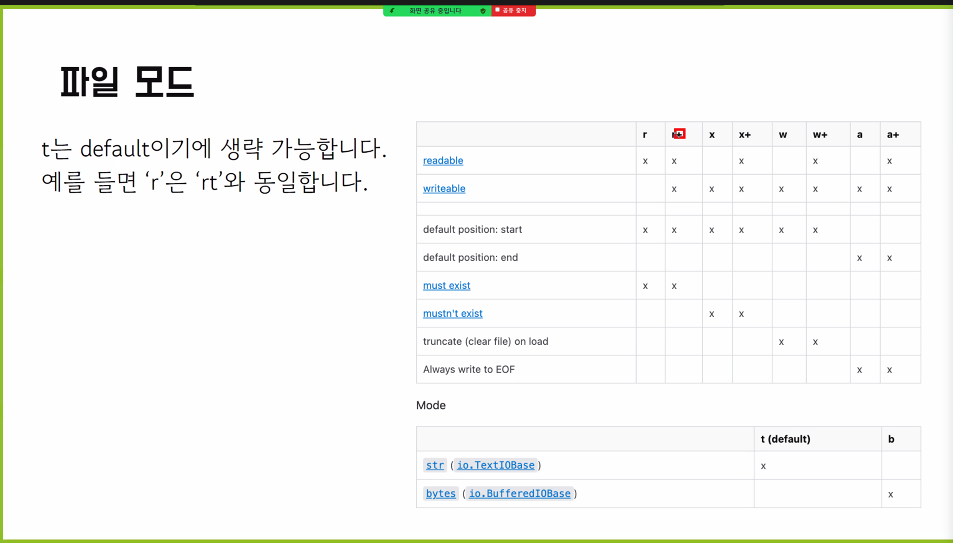

In [47]:
import os
path = "./datas/"
files = [path + file for file in os.listdir(path)]
files

['./datas/england-captain-stokes-has-no-regrets-over-follow-on-2023-02-28.html',
 './datas/global-markets-view-europe-2023-02-28.html',
 './datas/home-zara-fast-slow-fashion-collide-2023-02-28.html',
 './datas/indias-adani-plans-repay-up-790-mln-share-backed-loans-by-march-sources-2023-02-28.html',
 './datas/smith-says-australia-batsmen-will-ditch-risky-tempo-third-test-2023-02-28.html']

In [50]:
with open(files[2], 'r', encoding='utf-8') as f:
    html = f.read()

In [51]:
html

'<!DOCTYPE html><html lang="en"><head><title>At the home of Zara, fast and slow fashion collide | Reuters</title><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="apple-itunes-app" content="app-id=602660809" app-argument="https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/?id=5XRMKPAX2JNWTBRQINKB2YI6MA"/><script>(function(){\n      var current_location = window.location.href;\n\n      if (current_location.indexOf(\'/info-pages/supported-browsers/\') === -1) {\n        var supportFetchApi = \'fetch\' in window;\n        var supportCSSGrid = window.CSS && CSS.supports(\'display\', \'grid\');\n\n        if (!supportFetchApi && !supportCSSGrid) {\n          window.location.href = \'/info-pages/supported-browsers/\';\n        }\n      }\n    })()</script><script src="/pf/resources/dist/reuters/js/index.js?d=131" async="" data-config="{&quot;API_ORIGIN&quot;:&quot;https://api-reuters-reuters-prod.cdn.arcpublishing.co

In [52]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
title = soup.select_one('h1')
print(title.text)

At the home of Zara, fast and slow fashion collide


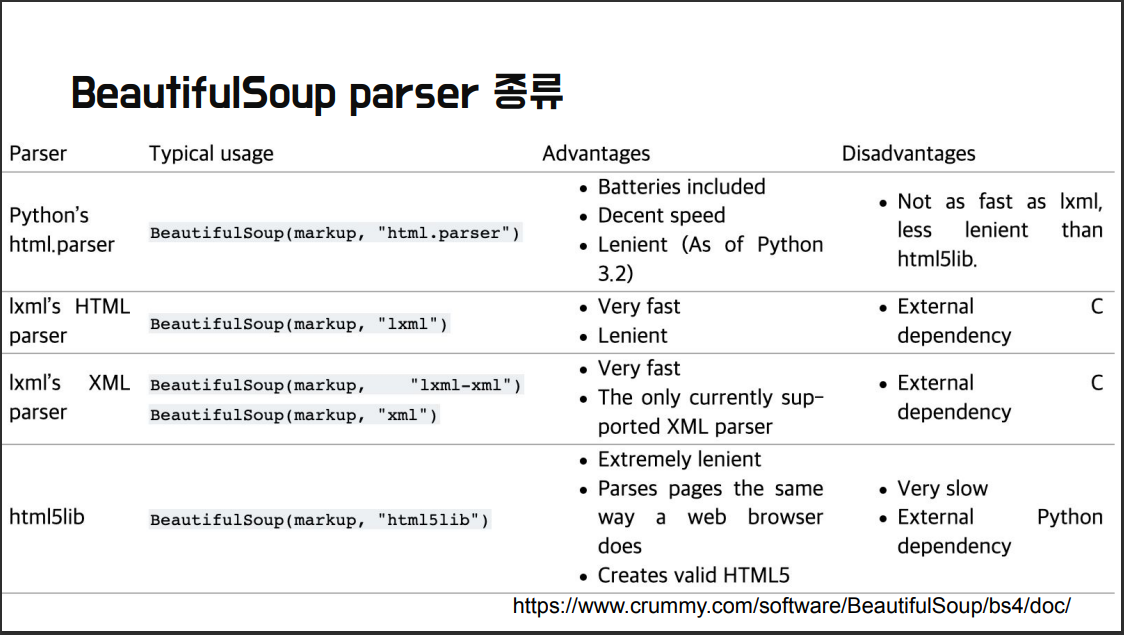

In [53]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
title = soup.select_one('#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > header > div > div > h1')
print(title.text)

At the home of Zara, fast and slow fashion collide


In [54]:
soup.h1

<h1 class="text__text__1FZLe text__dark-grey__3Ml43 text__medium__1kbOh text__heading_3__1kDhc heading__base__2T28j heading__heading_3__3aL54 article-header__title__3Y2hh" data-testid="Heading">At the home of Zara, fast and slow fashion collide</h1>

In [55]:
soup.title.text

'At the home of Zara, fast and slow fashion collide | Reuters'

In [56]:
soup.select_one('#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > div > div > div.article-body__content__17Yit.paywall-article > p:nth-child(2)')

<p class="text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__large__nEccO body__full_width__ekUdw body__large_body__FV5_X article-body__element__2p5pI" data-testid="paragraph-0" style="font-size:20px">A CORUNA, Spain/LONDON, Feb 28 (Reuters) - In Spain's A Coruna, two contrasting fashion business models collide - pitching the growing demands for the clothing industry to become more sustainable against the constant need to drive sales.</p>

In [57]:
soup.p.text

'[1/5]\xa0Marian Fernandez, 56, a former employee of Inditex, rearranges clothes at her fashion store Maazi from where she also posts weekly videos on social media on how to build a "responsible" wardrobe, in downtown A Coruna, in northern Spain, November 18, 2022. REUTERS/Miguel Vidal'

In [58]:
soup.find('link', {'rel':'canonical'})['href']

'https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/'